In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
sns.set_context('paper')
sns.set_style("white")
sns.set_style('ticks')
#sns.plt.style.use(['seaborn-ticks', 'seaborn-paper'])
sns.plt.rcParams['text.usetex'] = True
sns.plt.rcParams['text.latex.preamble'] = [r'\usepackage{lmodern}']
figure_width=6
boxplot_kwargs={'fliersize':4}

In [74]:
comparison = pd.read_pickle('/Volumes/labs/maxh/bayesian_microbiome/own_implementation/HorseshoeDMRegression/dmbvs_results.pck')
dataset_parameters = comparison.columns[:5].tolist()
print(comparison.shape)
comparison.head()

(332000, 10)


,OTUs,Covariates,Data p0,Samples,Repetition,Dataset,Groundtruth,Prediction (mean),Prediction (std),Variable
0,40,10,20,140,2,40O_10C_20p0_140S_2R,-0.986944,-0.963441,NaN,alpha
1,40,10,20,140,2,40O_10C_20p0_140S_2R,-2.191774,-2.245184,NaN,alpha
2,40,10,20,140,2,40O_10C_20p0_140S_2R,-1.438450,-1.558892,NaN,alpha
3,40,10,20,140,2,40O_10C_20p0_140S_2R,-0.367204,-0.366904,NaN,alpha
4,40,10,20,140,2,40O_10C_20p0_140S_2R,-2.134525,-1.956535,NaN,alpha


In [75]:
beta = comparison[comparison.Variable == 'beta']
beta['GT True'] = beta.Groundtruth != 0
beta.head()

/Users/maexlich/.miniconda/envs/bayesian_microbiome/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,OTUs,Covariates,Data p0,Samples,Repetition,Dataset,Groundtruth,Prediction (mean),Prediction (std),Variable,GT True
880,40,10,20,140,2,40O_10C_20p0_140S_2R,-0.875,-0.910168,1,beta,True
881,40,10,20,140,2,40O_10C_20p0_140S_2R,0.000,0.107446,0.006,beta,False
882,40,10,20,140,2,40O_10C_20p0_140S_2R,0.000,0.113252,0.01,beta,False
883,40,10,20,140,2,40O_10C_20p0_140S_2R,0.000,0.141076,0.012,beta,False
884,40,10,20,140,2,40O_10C_20p0_140S_2R,0.000,0.095278,0.004,beta,False


In [76]:
beta['Prediction (std)'] = beta['Prediction (std)'].astype(float)

/Users/maexlich/.miniconda/envs/bayesian_microbiome/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


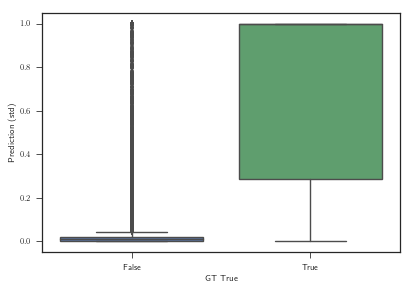

In [77]:
sns.boxplot(data=beta, x='GT True', y='Prediction (std)')

In [78]:
def compute_confusion_matrix(data):
    predicted = data['Prediction (std)'] > 0.5
    gt = data['GT True'].astype(bool)
    TP = np.sum(predicted & gt)
    TN = np.sum((~predicted) & (~gt))
    FP = np.sum(predicted & (~gt))
    FN = np.sum((~predicted) & gt)
    N = TP + TN + FP + FN
    return pd.Series({'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN, 'N':N})

confusion_parameters = beta.groupby(dataset_parameters, as_index=False).apply(compute_confusion_matrix).reset_index()
p = confusion_parameters
confusion_parameters['MCC'] = (p.TP*p.TN - p.FN*p.FP)/np.sqrt((p.TP + p.FP)*(p.TP + p.FN)*(p.TN + p.FP)*(p.TN + p.FN))

In [79]:
confusion_parameters

,OTUs,Covariates,Data p0,Samples,Repetition,FN,FP,N,TN,TP,MCC
0,40,10,20,20,2,10,1,400,379,10,0.662848
1,40,10,20,60,2,4,0,400,380,16,0.889757
2,40,10,20,100,2,1,0,400,380,19,0.973399
3,40,10,20,140,2,2,0,400,380,18,0.946197
4,40,10,20,180,2,0,1,400,379,20,0.974615
5,40,10,20,220,2,0,0,400,380,20,1.000000
6,40,30,25,20,2,12,0,1200,1175,13,0.717456
7,40,30,25,60,2,5,2,1200,1173,20,0.849904
8,40,30,25,100,2,1,1,1200,1174,24,0.959149
9,40,30,25,140,2,1,2,1200,1173,24,0.940088


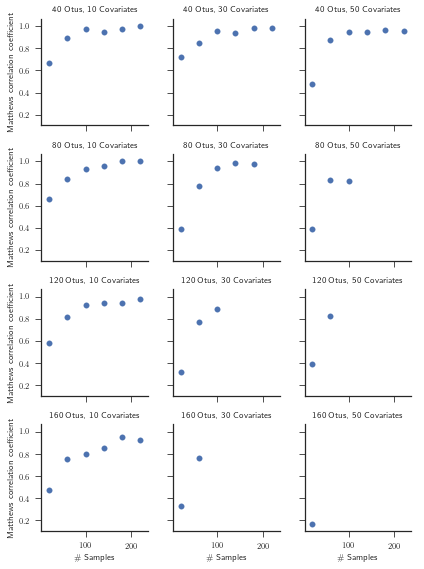

In [80]:
#confusion_parameters_rep1 = confusion_parameters[confusion_parameters.Repetition == 2]
g = sns.FacetGrid(data=confusion_parameters, col='Covariates', row='OTUs', hue='Repetition', size=2, aspect=1)
def plot_with_errorbar(samples, data, **kwargs):
    unique_samples, inverse = np.unique(samples, return_inverse=True)
    means = []
    sds = []
    for i in range(len(unique_samples)):
        sel = inverse == i
        means.append(data[sel].mean())
        sds.append(data[sel].std())
    sns.plt.errorbar(unique_samples, means, yerr=sds, **kwargs)
g.map(sns.plt.scatter, 'Samples', 'MCC')
g.set_titles('{row_name} Otus, {col_name} Covariates')
g.set_ylabels('Matthews correlation coefficient')
g.set_xlabels('\\# Samples')
#l = sns.plt.Legend(g.axes[0,0],handles, labels, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0, ax=g.axes[0, 0])
#sns.plt.savefig('/Users/maexlich/Google Drive/Studium/Master/4. Masterthesis/3. Thesis/Figures/Results/Variable-selection/screening-mcc-values.pdf', bbox_extra_artists=(l,), bbox_inches='tight')

In [81]:
def bfdr(data, threshold):
    data = data.copy()
    inclusion_probabilities = data['Prediction (std)']
    assert np.all(inclusion_probabilities <= 1) and np.all(inclusion_probabilities >= 0)
    assert 0 < threshold < 1

    onek = ((1 - inclusion_probabilities) < threshold).astype(float)

    # possible to select none
    if np.sum(onek) == 0:
        selected = np.full(len(onek), False)
        thecut = 0
    else:
        thecut = np.sum((1 - inclusion_probabilities) * onek) / np.sum(onek)
        selected = (1 - inclusion_probabilities) < thecut
    data['Selected'] = selected
    return data

bfdr_compute = lambda data: bfdr(data, 0.05)

selected_beta = beta.groupby('Dataset', as_index=False).apply(bfdr_compute).reset_index().drop(['level_0', 'level_1'], axis=1)

In [82]:
selected_beta

,OTUs,Covariates,Data p0,Samples,Repetition,Dataset,Groundtruth,Prediction (mean),Prediction (std),Variable,GT True,Selected
0,120,10,60,100,2,120O_10C_60p0_100S_2R,0.500,0.386086,1.000,beta,True,True
1,120,10,60,100,2,120O_10C_60p0_100S_2R,0.000,-0.016018,0.006,beta,False,False
2,120,10,60,100,2,120O_10C_60p0_100S_2R,0.000,-0.215557,0.004,beta,False,False
3,120,10,60,100,2,120O_10C_60p0_100S_2R,0.000,-0.046430,0.012,beta,False,False
4,120,10,60,100,2,120O_10C_60p0_100S_2R,0.000,-0.028457,0.006,beta,False,False
5,120,10,60,100,2,120O_10C_60p0_100S_2R,0.000,-0.006110,0.006,beta,False,False
6,120,10,60,100,2,120O_10C_60p0_100S_2R,0.000,0.043525,0.002,beta,False,False
7,120,10,60,100,2,120O_10C_60p0_100S_2R,0.000,0.000000,0.000,beta,False,False
8,120,10,60,100,2,120O_10C_60p0_100S_2R,0.000,0.083487,0.006,beta,False,False
9,120,10,60,100,2,120O_10C_60p0_100S_2R,0.000,0.150808,0.044,beta,False,False


In [83]:
def compute_confusion_matrix(data):
    predicted = data['Selected']
    gt = data['GT True'].astype(bool)
    TP = np.sum(predicted & gt)
    TN = np.sum((~predicted) & (~gt))
    FP = np.sum(predicted & (~gt))
    FN = np.sum((~predicted) & gt)
    N = TP + TN + FP + FN
    return pd.Series({'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN, 'N':N})

confusion_parameters_selected = selected_beta.groupby('Dataset').apply(compute_confusion_matrix)
p = confusion_parameters
confusion_parameters_selected['MCC'] = (p.TP*p.TN - p.FN*p.FP)/np.sqrt((p.TP + p.FP)*(p.TP + p.FN)*(p.TN + p.FP)*(p.TN + p.FN))

In [84]:
confusion_parameters_selected

,FN,FP,N,TN,TP,MCC
Dataset,,,,,,
120O_10C_60p0_100S_2R,18,0,1200,1140,42,NaN
120O_10C_60p0_140S_2R,20,0,1200,1140,40,NaN
120O_10C_60p0_180S_2R,10,0,1200,1140,50,NaN
120O_10C_60p0_20S_2R,48,0,1200,1140,12,NaN
120O_10C_60p0_220S_2R,11,0,1200,1140,49,NaN
120O_10C_60p0_60S_2R,28,0,1200,1140,32,NaN
120O_30C_65p0_100S_2R,24,0,3600,3535,41,NaN
120O_30C_65p0_20S_2R,62,0,3600,3535,3,NaN
120O_30C_65p0_60S_2R,36,0,3600,3535,29,NaN
